# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [5]:
import csv
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import PIL
import random
import requests
import seaborn as sns
import tensorflow as tf
from io import BytesIO
from PIL import Image
from tensorflow.contrib.layers import flatten

In [6]:
# Load pickled data
file_path = 'traffic-signs-data/'
training_file = file_path + 'train.p'
validation_file= file_path + 'valid.p'
testing_file = file_path + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [7]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))
                
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [8]:
with open('signnames.csv','r') as file:
    reader = csv.reader(file)
    label_rows = [row for row in reader]

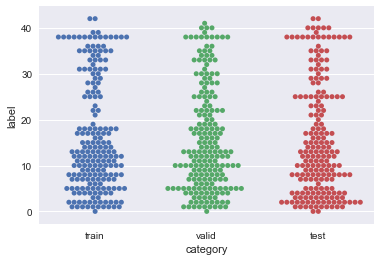

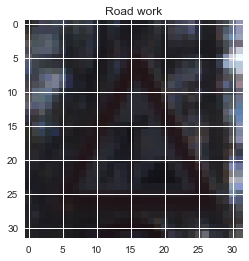

In [9]:
# make dataframe for swarmplot. Take a random sampling from each because the swarmplot would be huge otherwise
%matplotlib inline

train_list = [[label,'train'] for label in np.random.choice(y_train, 200)]
valid_list = [[label, 'valid'] for label in np.random.choice(y_valid, 200)]
test_list = [[label, 'test'] for label in np.random.choice(y_test, 200)]
labels_df = pd.DataFrame(train_list + valid_list + test_list, columns = ["label", "category"])

ax = sns.swarmplot(x="category", y="label", data=labels_df)
sns.plt.show()

index = random.randint(0, len(X_train))
label = y_train[index]
plt.imshow(X_train[index]);
plt.title(label_rows[label+1][1]);


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [ ]:
# optional Grayscale preprocessing step
def toGrayscale(images):
    gray = [[cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)] for image in images]
    return np.reshape(np.array(gray),(len(gray),32,32,1) )

In [ ]:
normalize = np.vectorize(lambda pixel: (pixel - 128)/ 128)
X_valid = normalize(X_valid)
X_train = normalize(X_train)

In [ ]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [ ]:
def getFilterDim(input, new_dim, stride):
    return -new_dim * stride + input + 1

def getPoolFilterDim(input, new_dim, stride):
    return (-new_dim + 1) * stride  + input

In [ ]:
def LeNet(x):        
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Using valid padding throughout the network
    padding = 'VALID'

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    input_depth = int(x[0].shape[2])
    filter_dim = getFilterDim(32, 28, 1)    
    conv1_w = tf.Variable(tf.truncated_normal([filter_dim, filter_dim, input_depth, 6],mean = mu, stddev = sigma), name='conv1_w')
    conv1_b = tf.Variable(tf.zeros(6), name='conv1_b')
    conv1 = tf.nn.conv2d(x, conv1_w, strides = [1, 1, 1, 1], padding = padding) + conv1_b

    # Activation.
    layer1 = tf.nn.relu(conv1)
    
    #  Pooling. Input = 28x28x6. Output = 14x14x6.        
    filter_dim = getPoolFilterDim(28,14,2)    
    pool1 = tf.nn.max_pool(layer1, ksize = [1, filter_dim, filter_dim, 1], strides = [1, 2, 2, 1], padding = padding)
 
    # Layer 2: Convolutional. Output = 10x10x16.
    filter_dim = getFilterDim(14, 10, 1)    
    conv2_w = tf.Variable(tf.truncated_normal([filter_dim, filter_dim, 6, 16],mean = mu, stddev = sigma), name='conv2_w')
    conv2_b = tf.Variable(tf.zeros(16), name='conv2_b')
    conv2 = tf.nn.conv2d(pool1, conv2_w, strides = [1, 1, 1, 1], padding = padding) + conv2_b

    # Activation.
    layer2 = tf.nn.relu(conv2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.   
    filter_dim = getPoolFilterDim(10, 5, 2)    
    pool2 = tf.nn.max_pool(layer2, ksize = [1, filter_dim, filter_dim, 1], strides = [1, 2, 2, 1], padding = padding)    

    # Flatten. Input = 5x5x16. Output = 400.
    flat = flatten(pool2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape=(400, 120),mean = mu, stddev = sigma), name='fc1_w')
    fc1_b = tf.Variable(tf.zeros(120), name='fc1_b')    
    fc1   = tf.matmul(flat, fc1_w) + fc1_b
    
    # Activation.
    layer3 = tf.nn.relu(fc1)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape=(120, 84),mean = mu, stddev = sigma), name='fc2_w')
    fc2_b = tf.Variable(tf.zeros(84), name='fc2_b')   
    fc2  = tf.matmul(layer3, fc2_w) + fc2_b
    
    # Activation.
    layer4 = tf.nn.relu(fc2)
    layer4 = tf.nn.dropout(layer4, keep_prob)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_w = tf.Variable(tf.truncated_normal(shape=(84, 43),mean = mu, stddev = sigma), name='fc3_w')
    fc3_b = tf.Variable(tf.zeros(43), name='fc3_b')   
    logits  = tf.matmul(layer4, fc3_w) + fc3_b
    
    return logits

In [ ]:
EPOCHS = 10
BATCH_SIZE = 128

# Set up tensorFlow variables
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y,43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
rate = 0.002

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [ ]:
save_file = './model.ckpt'

In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
softmax = tf.nn.softmax(logits)
top_softmax = tf.argmax(softmax,1)

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})       
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [78]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.838

EPOCH 2 ...
Validation Accuracy = 0.918

EPOCH 3 ...
Validation Accuracy = 0.930

EPOCH 4 ...
Validation Accuracy = 0.942

EPOCH 5 ...
Validation Accuracy = 0.950

EPOCH 6 ...
Validation Accuracy = 0.950

EPOCH 7 ...
Validation Accuracy = 0.941

EPOCH 8 ...
Validation Accuracy = 0.947

EPOCH 9 ...
Validation Accuracy = 0.940

EPOCH 10 ...
Validation Accuracy = 0.957

Model saved


### Evaluate trained and validated model on test data

In [80]:
# check accuracy on test data
with tf.Session() as sess:
    saver.restore(sess, save_file)
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.917


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [57]:
image_urls = [
    "http://www.cusack.co.uk/imagecache/07b66848-f945-4624-8a59-a0de00f01718_800x800.jpg",
    "http://media.gettyimages.com/photos/german-traffic-signs-picture-id459381023?s=170667a",
    "http://a.rgbimg.com/cache1nHmS6/users/s/su/sundstrom/300/mifuUb0.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/STOP_sign.jpg/220px-STOP_sign.jpg",
    "https://img.clipartfest.com/ef5ae310c8b4a3c120455ff86e8678ac_german-traffic-sign-no-205-traffic-on-205_1300-879.jpeg"
]
expected_labels = [17, 1, 25, 14, 13]

In [58]:
web_images = []

for url in image_urls:
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = np.asarray(img.resize((32,32), PIL.Image.ANTIALIAS))
    web_images.append(img)

### Predict the Sign Type for Each Image

In [59]:
web_images_normalized = normalize(web_images)

with tf.Session() as sess:
    saver.restore(sess, save_file)
    predictions = sess.run(top_softmax, feed_dict={x: web_images_normalized, keep_prob: 1})

Expected Lables  [17, 1, 25, 14, 13]
Predicted Labels [17  1 25 14 13]

Expected:  No entry
Predicted: No entry


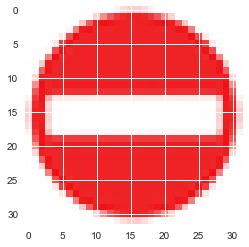

Expected:  Speed limit (30km/h)
Predicted: Speed limit (30km/h)


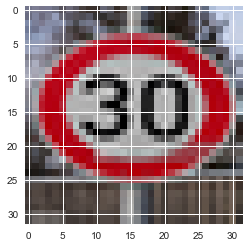

Expected:  Road work
Predicted: Road work


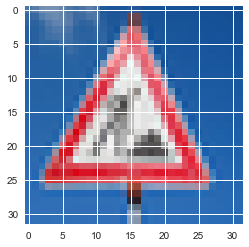

Expected:  Stop
Predicted: Stop


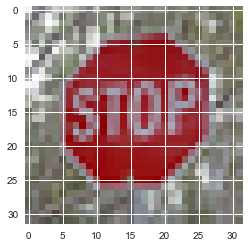

Expected:  Yield
Predicted: Yield


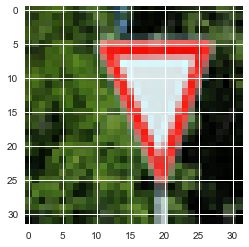

In [60]:
print("Expected Lables  " + str(expected_labels))
print("Predicted Labels " + str(predictions))
print()

for i in range(len(web_images)):
    print("Expected:  " + label_rows[expected_labels[i]+1][1])
    print("Predicted: " + label_rows[predictions[i]+1][1])
    
    plt.imshow(web_images[i])
    plt.show()

### Analyze Performance

In [61]:
### Calculate the accuracy for these 5 new images. 
print(str(sum(expected_labels == predictions)/len(predictions) * 100) + "%")

100.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [62]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
with tf.Session() as sess:
    saver.restore(sess, save_file)
    probabilities = sess.run(tf.nn.top_k(softmax, k=5), feed_dict = {x:web_images_normalized,keep_prob:1.0})
print(probabilities)

TopKV2(values=array([[  1.00000000e+00,   1.55948754e-18,   1.24926296e-29,
          2.52314596e-30,   1.56718141e-32],
       [  4.84122187e-01,   4.51010138e-01,   6.46315143e-02,
          2.35438478e-04,   1.35485834e-07],
       [  9.84733164e-01,   1.50241526e-02,   1.19586432e-04,
          7.56106165e-05,   4.05349492e-05],
       [  9.99995708e-01,   2.85718920e-06,   1.43404714e-06,
          8.92195740e-09,   8.61496030e-09],
       [  1.00000000e+00,   1.37866714e-08,   6.58397337e-10,
          3.79426421e-11,   2.40710598e-12]], dtype=float32), indices=array([[17, 14, 26,  0,  9],
       [ 1,  3,  5,  2, 20],
       [25, 30, 24, 23, 21],
       [14, 17, 25, 10,  5],
       [13,  5,  3, 25,  2]]))


In [1]:
for i in range(len(probabilities[0])):
    print()
    print("Image " + str(i+1))
    for j in range(len(probabilities[0][0])):
        print(label_rows[probabilities[1][i][j]+1][1], probabilities[0][i][j])

NameError: name 'probabilities' is not defined